In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
message = [line.rstrip() for line in open('Text HAM SPAM calssification.csv')]
print(len(message))

1792


In [3]:
for i,j in enumerate(message[:10]):
    print(i,j)
    print('\n')

0 Category,Message


1 ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."


2 ham,Ok lar... Joking wif u oni...


3 spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


4 ham,U dun say so early hor... U c already then say...


5 ham,Your gonna have to pick up a $1 burger for yourself on your way home. I can't even move. Pain is killing me.


6 ham,Ha ha ha good joke. Girls are situation seekers.


7 ham,Its a part of checking IQ


8 ham,"Sorry my roommates took forever, it ok if I come by now?"


9 ham,Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.




In [4]:
df = pd.read_csv('Text HAM SPAM calssification.csv')
df.shape

(1791, 2)

In [5]:
df.describe()

,Category,Message
count,1726,1791
unique,2,1729
top,ham,"Sorry, I'll call later"
freq,1490,10


In [6]:
df["Category"].value_counts()

ham     1490
spam     236
Name: Category, dtype: int64

##### visualization of ham and spam with word cloud

In [7]:
from wordcloud import WordCloud

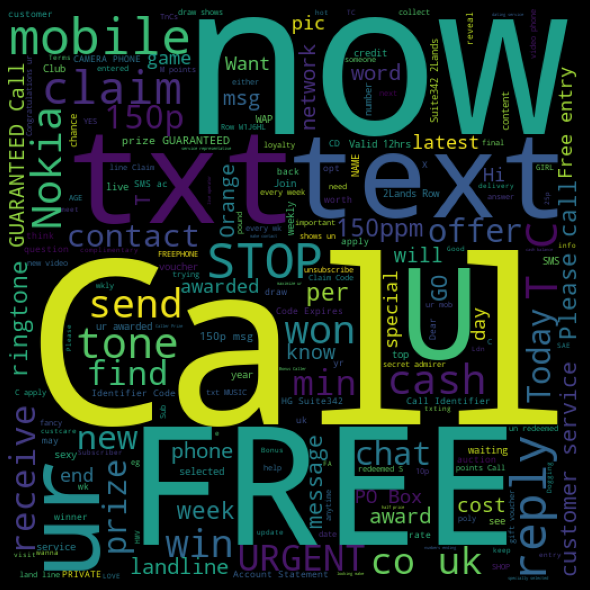

In [8]:
spam_words = ' '.join(list(df[df['Category'] == 'spam'] ['Message']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8) ,facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

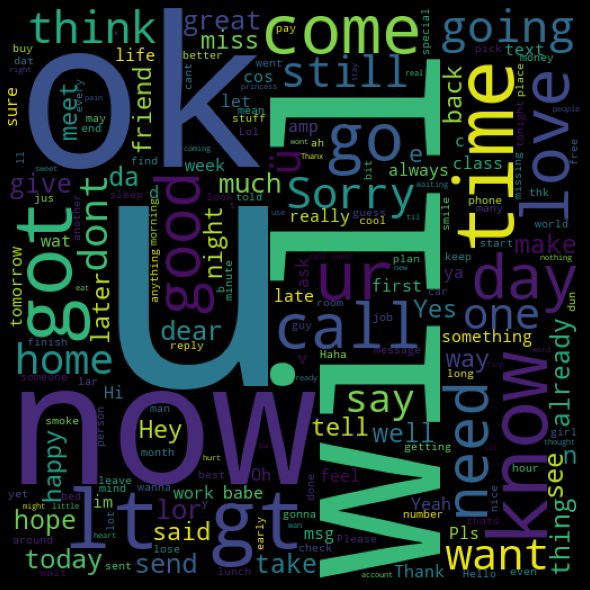

In [9]:
spam_words = ' '.join(list(df[df['Category'] == 'ham'] ['Message']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8) ,facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [10]:
df.isnull().sum()

Category    65
Message      0
dtype: int64

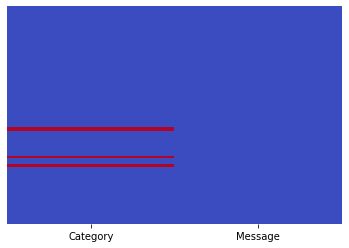

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm')

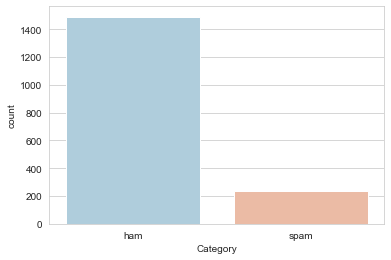

In [12]:
sns.set_style("whitegrid")
sns.countplot(x = "Category", data = df, palette = "RdBu_r")

##### removing missing value from the columns

In [13]:
#df["Category" ].fillna('No Category', inplace = True)
df.dropna(inplace = True)

In [58]:
df.isnull().sum().sum()

0

In [59]:
df["Category"].value_counts()

ham     1490
spam     236
Name: Category, dtype: int64

In [60]:
df.groupby('Category').describe()

length                                                        
           count        mean        std  min    25%    50%    75%    max
Category                                                                
ham       1490.0   72.387919  57.925555  3.0   33.0   53.0   99.0  910.0
spam       236.0  137.186441  30.711270  7.0  132.0  148.0  156.0  223.0

In [61]:
df['length']=df['Message'].apply(len)
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,Your gonna have to pick up a $1 burger for you...,108


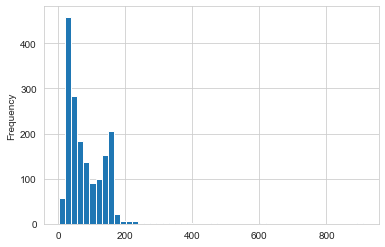

In [62]:
df['length'].plot(bins=50,kind='hist')

In [63]:
df.length.describe()

count    1726.000000
mean       81.247972
std        59.335596
min         3.000000
25%        36.000000
50%        63.000000
75%       126.000000
max       910.000000
Name: length, dtype: float64

 <b>Observation:-</b> - the longest messege is 910 character long, lets have a look at that

In [64]:
df[df['length']==910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

##### Text preprocessing

In [65]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [66]:
def text_process(mess):
    nopunc =[i for i in mess if i not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [i for i in nopunc.split() if i.lower() not in stopwords.words('english')]

In [67]:
df['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [gonna, pick, 1, burger, way, home, cant, even...
Name: Message, dtype: object

In [68]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Message'])
print(len(bow_transformer.vocabulary_))

5556


In [69]:
messages_bow = bow_transformer.transform(df['Message'])
messages_bow.shape

(1726, 5556)

##### vectorising the text with TFIDF

In [89]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1726, 5556)


In [91]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf,df['Category'])

In [92]:
pred = spam_detect_model.predict(messages_tfidf)
print(pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [93]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df['Category'],pred))
print(confusion_matrix(df['Category'],pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1490
        spam       1.00      0.76      0.86       236

    accuracy                           0.97      1726
   macro avg       0.98      0.88      0.92      1726
weighted avg       0.97      0.97      0.97      1726

[[1490    0]
 [  57  179]]


##### splitting the data

In [94]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,cat_train,cat_test = train_test_split(df['Message'],df['Category'],test_size=0.2)

In [95]:
print(len(msg_train),len(msg_test),len(cat_train),len(cat_test))

1380 346 1380 346


##### creating a pipeline

In [98]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [99]:
pipeline.fit(msg_train,cat_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001FFB15B68B8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [100]:
predictions = pipeline.predict(msg_test)

In [102]:
print(classification_report(predictions,cat_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98       325
        spam       0.58      1.00      0.74        21

    accuracy                           0.96       346
   macro avg       0.79      0.98      0.86       346
weighted avg       0.97      0.96      0.96       346

